In [ ]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
from tqdm.auto import tqdm
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
random.seed(123)

### 데이터 불러오기
    
1. 센서데이터
+ 센서 데이터는 98개의 sheet로 이루어진 엑셀 데이터
+ panda에서 여러개의 sheet로 구성된 엑셀 데이터에서 특정 sheet만 불러오고 싶을때는 다음과 같은 코드를 이용

```
# load excel sheet
data = pd.read_excel('<excel data 경로>', sheet_name='<sheet name>')
```



In [ ]:
sheet_name = ['sample 1', 'sample 2', 'sample 3', 'sample 4', 'sample 5', 'sample 6', 'sample 7', 'sample 8', 'sample 9', \
              'sample 10', 'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 15', 'sample 16', 'sample 17', 'sample 18',\
              'sample 19', 'sample 20', 'sample 21', 'sample 22', 'sample 23', 'sample 24', 'sample 25', 'sample 26', 'sample 27',\
              'sample 28', 'sample 29', 'sample 30', 'sample 31', 'sample 32', 'sample 33', 'sample 34', 'sample 35', 'sample 36',\
              'sample 37', 'sample 38', 'sample 39', 'sample 40', 'sample 41', 'sample 42', 'sample 43', 'sample 44', 'sample 45',\
              'sample 46', 'sample 47', 'sample 48', 'sample 49', 'sample 50', 'sample 51', 'sample 52', 'sample 53', 'sample 54',\
              'sample 55', 'sample 56', 'sample 57', 'sample 58', 'sample 59', 'sample 60', 'sample 61', 'sample 62', 'sample 63',\
              'sample 64', 'sample 65', 'sample 66', 'sample 67', 'sample 68', 'sample 69', 'sample 70', 'sample 71', 'sample 72',\
              'sample 73', 'sample 74', 'sample 75', 'sample 76', 'sample 77', 'sample 78', 'sample 79', 'sample 80', 'sample 81',\
              'sample 82', 'sample 83', 'sample 84', 'sample 85', 'sample 86', 'sample 87', 'sample 88', 'sample 89', 'sample 90',\
              'sample 91', 'sample 92', 'sample 93', 'sample 94', 'sample 95', 'sample 96', 'sample 97', 'sample 98']

#### "sample 1"이라고 이름 붙여진 sheet 불러오기

+ sample 1 sheet 불러오기

In [ ]:
sensor_data_1.shape

(92, 13)

In [ ]:
sensor_data_1.head()

,temp,humi,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11
0,322.85,360.98,37.24,33.23,16.67,16.93,21.78,22.94,36.98,29.62,20.25,23.88,21.96
1,324.85,359.98,37.24,33.23,16.67,16.93,20.78,19.94,35.98,22.62,16.25,27.88,29.96
2,322.85,360.98,37.24,34.23,16.67,16.93,21.78,27.94,35.98,18.62,26.25,21.88,25.96
3,324.85,360.98,38.24,34.23,16.67,16.93,20.78,29.94,36.98,24.62,23.25,22.88,31.96
4,325.85,360.98,37.24,34.23,16.67,23.93,21.78,16.94,36.98,20.62,19.25,20.88,32.96


+ sample 81 불러오기

In [ ]:
sensor_data_81.shape

(57, 13)

In [ ]:
sensor_data_81.head()

,temp,humi,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11
0,1647.58,1695.95,117.6,115.07,77.88,64.74,97.84,55.86,181.96,99.85,71.26,155.72,95.81
1,1644.58,1696.95,119.6,114.07,76.88,69.74,94.84,64.86,181.96,96.85,95.26,156.72,109.81
2,1646.58,1696.95,118.6,115.07,76.88,63.74,100.84,48.86,180.96,102.85,82.26,163.72,95.81
3,1644.58,1695.95,118.6,112.07,75.88,64.74,93.84,40.86,181.96,106.85,78.26,160.72,98.81
4,1649.58,1694.95,116.6,108.07,74.88,56.74,89.84,62.86,181.96,94.85,82.26,164.72,107.81


+ sheet1부터 sheet98까지 차원을 확인해보기

sample 1 의 차원 : (92, 13)
sample 2 의 차원 : (75, 13)
sample 3 의 차원 : (70, 13)
sample 4 의 차원 : (62, 13)
sample 5 의 차원 : (57, 13)
sample 6 의 차원 : (234, 13)
sample 7 의 차원 : (77, 13)
sample 8 의 차원 : (71, 13)
sample 9 의 차원 : (67, 13)
sample 10 의 차원 : (50, 13)


2. 라벨데이터 
 + 각 센서 데이터 샘플이 어떠한 시료배합으로 실험을 진행하였는지를 보여주는 데이터
 
 + 변수 설명

    + sample : sample name
    + gas1 : 첫 번째의 원료 포함량
    + gas2 : 두 번째의 원료 포함량
    + gas3 : 세 번째의 원료 포함량
    + class : 같은 클래스 같은 원료 배합량을 가짐 (같은 클래스는 같은 원료배합량을 가짐) 


+ label 데이터 불러오기

+ label 데이터 차원 확인

+ label 데이터 첫 5행 확인

### Label 데이터의 결측값 처리

+ label 데이터에는 결측값이 존재하는데 이 경우에는 해당 가스를 투입하지 않은 것을 의미하기 대문에 결측값을 0으로 대체합니다

+ label 데이터 결측치 확인

+ label 데이터 결측치 0으로 대체

+ label 데이터의 결측치가 잘 대체 되었는지 확인

#### Label 할당함수

+ component의 투입량이 0보다 크면 1을 할당
+ 0값을 가지면 0을 할당

#### apply 함수

+ 데이터프레임의 열에 함수를 적용시키는 기능을 가짐
+ gas1_label이라는 열을 새로 만들고 새로 할당된 값들을 넣어주는 작업을 수행

+ 반복문 보다는 apply가 코드가 간편

In [ ]:
# label['gas1_label'] = None
# label['gas2_label'] = None
# label['gas3_label'] = None
# for i in range(label.shape[0]):
#     label.loc[i, 'gas1_label'] = label_allocation(label.loc[i, 'gas1'])
#     label.loc[i, 'gas2_label'] = label_allocation(label.loc[i, 'gas2'])
#     label.loc[i, 'gas3_label'] = label_allocation(label.loc[i, 'gas3'])

+ gas1에 label_allocation 함수 적용



In [ ]:
label['gas1_label'] = label['gas1'].apply(label_allocation)

+ gas2와 gas3에도 차례로 적용

+ 새로운 열 3개 가 추가 된 것을 볼 수 있음

+ 차후에 딥러닝 데이터를 만들때 좀더 효율적인 계산을 위해서 새로 추가된 3열의 데이터를 하나의 리스트로 묶어놓은 열(column)을 새로 추가

In [ ]:
cols = ['gas1_label', 'gas2_label', 'gas3_label']
label['one_hot'] = label[cols].values.tolist()

In [ ]:
label.head()

Train/Test 데이터 분할



```
random.sample(<전체 데이터 리스트>, <sampling할 표본의 수>)
```


```
# 차집합
set(A).difference(set(B))
```




+ .tolist() : pandas 데이터 열을 list 데이터 형태로 변환

In [ ]:
label['sample']

0      sample 1
1      sample 2
2      sample 3
3      sample 4
4      sample 5
        ...    
93    sample 94
94    sample 95
95    sample 96
96    sample 97
97    sample 98
Name: sample, Length: 98, dtype: object

In [ ]:
print(label['sample'].tolist())
print("전체 샘플 개수 : {}".format(len(label['sample'].tolist())))

['sample 1', 'sample 2', 'sample 3', 'sample 4', 'sample 5', 'sample 6', 'sample 7', 'sample 8', 'sample 9', 'sample 10', 'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 15', 'sample 16', 'sample 17', 'sample 18', 'sample 19', 'sample 20', 'sample 21', 'sample 22', 'sample 23', 'sample 24', 'sample 25', 'sample 26', 'sample 27', 'sample 28', 'sample 29', 'sample 30', 'sample 31', 'sample 32', 'sample 33', 'sample 34', 'sample 35', 'sample 36', 'sample 37', 'sample 38', 'sample 39', 'sample 40', 'sample 41', 'sample 42', 'sample 43', 'sample 44', 'sample 45', 'sample 46', 'sample 47', 'sample 48', 'sample 49', 'sample 50', 'sample 51', 'sample 52', 'sample 53', 'sample 54', 'sample 55', 'sample 56', 'sample 57', 'sample 58', 'sample 59', 'sample 60', 'sample 61', 'sample 62', 'sample 63', 'sample 64', 'sample 65', 'sample 66', 'sample 67', 'sample 68', 'sample 69', 'sample 70', 'sample 71', 'sample 72', 'sample 73', 'sample 74', 'sample 75', 'sample 76', 'sample 77', 'sample

+ random sampling

In [ ]:
# train_sample = ['sample 1', 'sample 3', 'sample 5', 'sample 6', 'sample 7', 'sample 9', 'sample 11',  'sample 12',\
#                'sample 13', 'sample 14', 'sample 16', 'sample 17', 'sample 18', 'sample 19', 'sample 20', 'sample 21',\
#                'sample 22', 'sample 24', 'sample 26', 'sample 27', 'sample 28', 'sample 31', 'sample 32', 'sample 33',\
#                'sample 34', 'sample 35', 'sample 36', 'sample 37', 'sample 38', 'sample 39', 'sample 41', 'sample 42',\
#                'sample 43', 'sample 44', 'sample 46', 'sample 47', 'sample 48', 'sample 49', 'sample 50', 'sample 51',\
#                'sample 52', 'sample 53', 'sample 54', 'sample 56', 'sample 58', 'sample 59', 'sample 60', 'sample 61',\
#                'sample 62', 'sample 65', 'sample 66', 'sample 68', 'sample 69', 'sample 70', 'sample 71', 'sample 72',\
#                'sample 73', 'sample 74', 'sample 75', 'sample 76', 'sample 77', 'sample 78', 'sample 79', 'sample 80',\
#                'sample 82', 'sample 84', 'sample 85', 'sample 87', 'sample 88', 'sample 89', 'sample 90', 'sample 91',\
#                'sample 93', 'sample 94', 'sample 95', 'sample 96', 'sample 97', 'sample 98']
# test_sample = ['sample 2', 'sample 4', 'sample 8', 'sample 10', 'sample 15', 'sample 23', 'sample 25', 'sample 29', 'sample 30',\
#                'sample 40', 'sample 45', 'sample 55', 'sample 57', 'sample 63', 'sample 64', 'sample 67', 'sample 81', 'sample 83',\
#                'sample 86', 'sample 92']

+ train_sample

In [ ]:
print(train_sample)

['sample 1', 'sample 3', 'sample 5', 'sample 6', 'sample 7', 'sample 9', 'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 16', 'sample 17', 'sample 18', 'sample 19', 'sample 20', 'sample 21', 'sample 22', 'sample 24', 'sample 26', 'sample 27', 'sample 28', 'sample 31', 'sample 32', 'sample 33', 'sample 34', 'sample 35', 'sample 36', 'sample 37', 'sample 38', 'sample 39', 'sample 41', 'sample 42', 'sample 43', 'sample 44', 'sample 46', 'sample 47', 'sample 48', 'sample 49', 'sample 50', 'sample 51', 'sample 52', 'sample 53', 'sample 54', 'sample 56', 'sample 58', 'sample 59', 'sample 60', 'sample 61', 'sample 62', 'sample 65', 'sample 66', 'sample 68', 'sample 69', 'sample 70', 'sample 71', 'sample 72', 'sample 73', 'sample 74', 'sample 75', 'sample 76', 'sample 77', 'sample 78', 'sample 79', 'sample 80', 'sample 82', 'sample 84', 'sample 85', 'sample 87', 'sample 88', 'sample 89', 'sample 90', 'sample 91', 'sample 93', 'sample 94', 'sample 95', 'sample 96', 'sample 97', 'sam

+ test sample

In [ ]:
print(test_sample)

['sample 2', 'sample 4', 'sample 8', 'sample 10', 'sample 15', 'sample 23', 'sample 25', 'sample 29', 'sample 30', 'sample 40', 'sample 45', 'sample 55', 'sample 57', 'sample 63', 'sample 64', 'sample 67', 'sample 81', 'sample 83', 'sample 86', 'sample 92']


In [ ]:
print("train_sample의 수 :", len(train_sample))
print("test_sample의 수 :", len(test_sample))

train_sample의 수 : 78
test_sample의 수 : 20


#### CNN을 위한 데이터 셋을 만들기

+ 딥러닝의 장점을 활용하기에는 데이터의 수가 너무 적음
+ 데이터를 일정 시간단위로 잘라서 CNN학습을 진행하기 위한 데이터셋을 만드는 것을 목표로함

In [ ]:
time_lag = 30

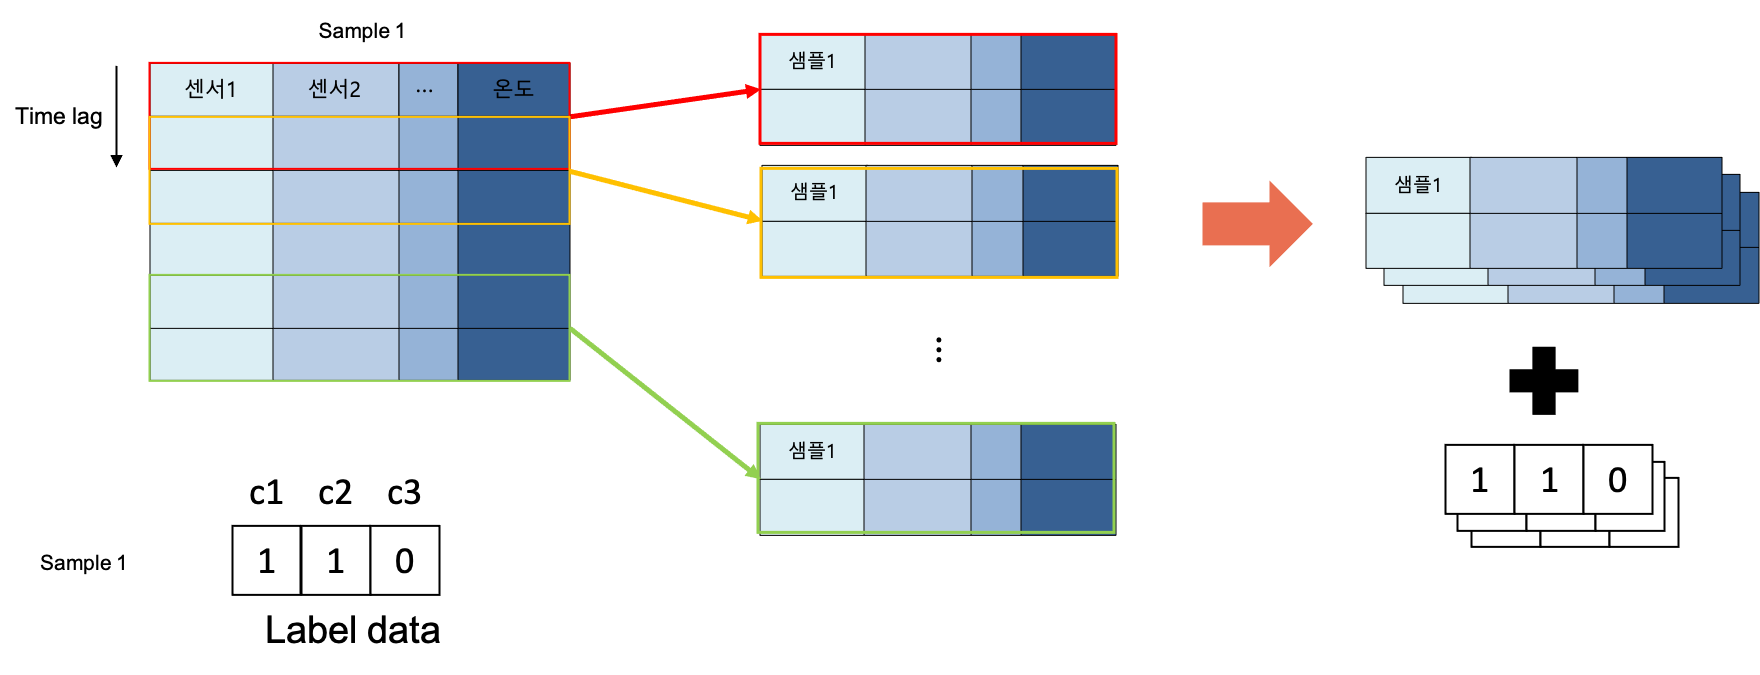

+ 첫 번째 sample의 센서데이터로 실험

In [ ]:
sensor_data_1.shape 

(92, 13)

In [ ]:
sensor_data_split_01 = making_data(sensor_data_1, time_lag)

+ 분할된 샘플의 개수 : 92-30+1 = 63

In [ ]:
sensor_data_split_01.shape

(63, 30, 13)

In [ ]:
label.loc[label['sample'] == 'sample 1', 'one_hot'].item()

[1, 1, 1]

+ 81번째 sample의 센서데이터로 실험

In [ ]:
sensor_data_81.shape

(57, 13)

In [ ]:
sensor_data_split_81 = making_data(sensor_data_81, time_lag)

+ 분할된 샘플의 개수 : 57-30+1

In [ ]:
sensor_data_split_81.shape 

(28, 30, 13)

In [ ]:
label.loc[label['sample'] == 'sample 81', 'one_hot'].item()

[0, 1, 1]

### 딥러닝학습을 위한 전처리

+ 딥러닝의 장점은 많은 양에 데이터셋에서 더 잘 발휘될 수 있음.
+ 현재 센서 데이터는 98개의 실험 데이터로 이루어져 있음.
+ 1개의 실험 데이터는 여러개의 row를 가지는 시계열 데이터셋으로 이루어 져 있으므로 이를 일정 시간단위를 기준으로 나누어 데이터 셋을 늘리는 작업을 수행

+ train dataset

+ numpt array로 바꾸기

In [ ]:
train_X = np.array(train_data)
train_y1 = np.array(train_y1)
train_y2 = np.array(train_y2)
train_y3 = np.array(train_y3)

In [ ]:
train_X.shape, train_y1.shape, train_y2.shape, train_y3.shape

((3083, 30, 13, 1), (3083,), (3083,), (3083,))

In [ ]:
test_data = np.empty((0, time_lag, 13, 1), float)
test_y1 = []
test_y2 = []
test_y3 = []
for ts in tqdm(test_sample):
    tmp_data = pd.read_excel('sensor_data.xlsx', sheet_name=ts)    
    tmp_result = making_data(tmp_data,time_lag)
    tmp_result = tmp_result.reshape(len(tmp_result),time_lag,13,1)
    test_data = np.append(test_data, tmp_result, axis=0)
    one_hot = label.loc[label['sample'] == ts, 'one_hot'].item()
    for i in range(tmp_result.shape[0]):
        test_y1.append(one_hot[0])
        test_y2.append(one_hot[1])
        test_y3.append(one_hot[2])

In [ ]:
test_X = np.array(test_data)
test_y1 = np.array(test_y1)
test_y2 = np.array(test_y2)
test_y3 = np.array(test_y3)

In [ ]:
test_X.shape, test_y1.shape, test_y2.shape, test_y3.shape

((742, 30, 13, 1), (742,), (742,), (742,))

### Keras CNN Model 학습

#### CNN model define

In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [ ]:
tf.random.set_seed(777)

In [ ]:
epochs = 100
lr = 0.002
batch_size = 64

$$output = \frac{input - kernel size + (2 \times padding)}{stride} + 1$$

input dimension = batch_size, data_shape, channel  

channel의 경우에는 보통 이미지 분석 시에 RGB값이 들어가는 자리이므로 현재 분석에서는 사용하지 않음

input dimension = (batch_size, 30, 13, 1)

+ padding을 추가히자 않았을 때
    + [{30 - 3 + (2 * 0) } / 1 ]  + 1 = 27
    + [{13 - 3 + (2 * 0) } / 1 ]  + 1 = 11

+ padding 추가 시
    + [{30 - 3 + (2 * 1) } / 1 ]  + 1 = 30
    + [{13 - 3 + (2 * 1) } / 1 ]  + 1 = 13

In [ ]:
models = Sequential([
    layers.Conv2D(32,(3,3), padding='same', activation = 'relu', input_shape=(time_lag,13,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 13, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 6, 32)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

#### 모델학습(target : component1)

+ 모델학습시에 accuracy, precision, recall 3가지를 고려해서 학습을 수행할 예정
+ Early stopping은 학습이 진행될 때 일정 수준 이상 loss가 줄어들지 않게 되면 학습을 종료시켜서 과적함을 방지하기 위한 기능
    + moniotr : 학습 중단 기준
    + min_delta : 최소한 변화량
    + patience : 몇번까지 기다릴 것인지 여부


```
# loss가 0.001만큼 5번 이상 변하지 않은 다면 학습을 중단시킴
EarlyStopping(monitor='loss', patience=5, min_delta=0.001)

# accuracy가 0.01만큼 3번 이상 변하지 않은 다면 학습을 중단시킴
EarlyStopping(monitor='accuracy', patience=3, min_delta=0.01)
```  



In [ ]:
precision = Precision()
recall = Recall()
# loss가 0.001만큼 3번 이상 변하지 않으면 학습을 중단시킴
early_stopping = EarlyStopping(monitor='loss', verbose=1, patience=3, min_delta=0.001)

In [ ]:
models.compile(optimizer='adam', \
               loss = 'binary_crossentropy',\
               metrics = ['accuracy', precision, recall])

In [ ]:
history = models.fit(train_X,train_y1, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/100
49/49 [==============================] - 3s 39ms/step - loss: 25.7360 - accuracy: 0.7960 - precision_3: 0.9190 - recall_3: 0.8524
Epoch 2/100
49/49 [==============================] - 2s 39ms/step - loss: 0.3327 - accuracy: 0.8988 - precision_3: 0.9469 - recall_3: 0.9416
Epoch 3/100
49/49 [==============================] - 2s 39ms/step - loss: 0.2839 - accuracy: 0.9092 - precision_3: 0.9526 - recall_3: 0.9479
Epoch 4/100
49/49 [==============================] - 2s 39ms/step - loss: 0.1285 - accuracy: 0.9542 - precision_3: 0.9671 - recall_3: 0.9831
Epoch 5/100
49/49 [==============================] - 2s 39ms/step - loss: 0.1515 - accuracy: 0.9426 - precision_3: 0.9636 - recall_3: 0.9730
Epoch 6/100
49/49 [==============================] - 2s 39ms/step - loss: 0.1123 - accuracy: 0.9550 - precision_3: 0.9701 - recall_3: 0.9805
Epoch 7/100
49/49 [==============================] - 2s 39ms/step - loss: 0.0966 - accuracy: 0.9625 - precision_3: 0.9719 - recall_3: 0.9870
Epoch 8/100


### Model 검증

#### model evaluation

+ evaluation1

In [ ]:
models.evaluate(test_X, test_y1)

24/24 [==============================] - 1s 8ms/step - loss: 0.0157 - accuracy: 0.9960 - precision_3: 0.9952 - recall_3: 1.0000


[0.015701506286859512, 0.9959568977355957, 0.9952229261398315, 1.0]

+ evaluation2(using sckit-learn)

In [ ]:
y_pred_prob = models.predict(test_X)

In [ ]:
y_pred_prob

In [ ]:
y_pred_prob.squeeze()

In [ ]:
y_pred_prob.squeeze() > 0.5

In [ ]:
y_pred = (y_pred_prob.squeeze() > 0.5).astype('int').tolist()

In [ ]:
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score,
                             roc_curve,
                             confusion_matrix,
                             auc)

array([[114,   3],
       [  0, 625]])

0.9959568733153639

0.9952229299363057

1.0

0.997605746209098

#### ROC curve 그리기

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y1, y_pred_prob)
roc_auc = auc(fpr, tpr)

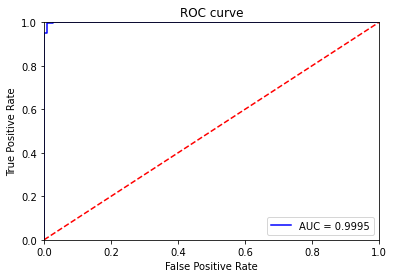

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### sample 단위로 검증하기

+ 위에 검증에서는 샘플단위로 compoent1에 포함여부를 본것이 아니기 때문에 샘플 단위로 테스트 셋을 만들어서 검증

In [ ]:
result_for_gas = label.loc[label['sample'].isin(test_sample), ['sample', 'gas1_label']]
result_for_gas.set_index('sample', inplace=True)
result_for_gas['gas1_predict'] = None

In [ ]:
result_for_gas

,gas1_label,gas1_predict
sample,,
sample 2,1,None
sample 4,1,None
sample 8,1,None
sample 10,1,None
sample 15,0,None
sample 23,1,None
sample 25,1,None
sample 29,1,None
sample 30,1,None


+ 위에 있는 데이터프레임에 있는 샘플 순서대로 검증을 하기 위해서 데이터 프레임의 index를 추출

In [ ]:
result_for_gas.index

In [ ]:
ts_idx = result_for_gas.index.tolist()

['sample 2', 'sample 4', 'sample 8', 'sample 10', 'sample 15', 'sample 23', 'sample 25', 'sample 29', 'sample 30', 'sample 40', 'sample 45', 'sample 55', 'sample 57', 'sample 63', 'sample 64', 'sample 67', 'sample 81', 'sample 83', 'sample 86', 'sample 92']


In [ ]:
print(ts_idx)

['sample 2', 'sample 4', 'sample 8', 'sample 10', 'sample 15', 'sample 23', 'sample 25', 'sample 29', 'sample 30', 'sample 40', 'sample 45', 'sample 55', 'sample 57', 'sample 63', 'sample 64', 'sample 67', 'sample 81', 'sample 83', 'sample 86', 'sample 92']


+ 샘플단위의 테스트 데이터 셋 만들기

In [ ]:
new_test_x.shape 

(20,)

In [ ]:
new_test_x[0].shape

(46, 30, 13, 1)

In [ ]:
y_pred_tmp = models.predict(new_test_x[0])
y_pred = (y_pred_tmp.squeeze() > 0.5).astype('int')

In [ ]:
(y_pred == 0).sum()

0

In [ ]:
(y_pred == 1).sum()

46

+ 샘플중에서 0으로 예측된 것도 있고 1로 예측된 것도 있을 수 있음
+ 이때 과반수 이상의 예측을 갖는 클래스를 할당
+ np.floor함수는 소숫점을 올림하는 기능을 가짐

In [ ]:
threshold = np.floor(len(new_test_x[0])/ 2)+1

In [ ]:
threshold

24.0

#### 전체데이터의 적용

In [ ]:
for idx in tqdm(range(len(new_test_x))):
    y_pred_tmp = models.predict(new_test_x[idx])
    y_pred = (y_pred_tmp.squeeze() > 0.5).astype('int')
    
    zero_check = (y_pred == 0).sum()
    threshold = np.floor(len(new_test_x[idx])/ 2) + 1 # 과반수 구하기
    if zero_check > threshold:
        result_for_gas['gas1_predict'][idx] = 0
    else: 
        result_for_gas['gas1_predict'][idx] = 1

In [ ]:
result_for_gas

,gas1_label,gas1_predict
sample,,
sample 2,1,1
sample 4,1,1
sample 8,1,1
sample 10,1,1
sample 15,0,0
sample 23,1,1
sample 25,1,1
sample 29,1,1
sample 30,1,1


In [ ]:
y_true_c1 = result_for_gas['gas1_label'].tolist()
y_pred_c1 = result_for_gas['gas1_predict'].tolist()

In [ ]:
confusion_matrix(y_true_c1, y_pred_c1)

array([[ 4,  0],
       [ 0, 16]])

In [ ]:
accuracy_score(y_true_c1, y_pred_c1) 

1.0

In [ ]:
precision_score(y_true_c1, y_pred_c1)

1.0

In [ ]:
recall_score(y_true_c1, y_pred_c1)

1.0

In [ ]:
f1_score(y_true_c1, y_pred_c1)

1.0